# Plot to verify agreement between best model and $\zeta$ Ophiuchi observable
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import * 
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [2]:
set_plotDefaults()

done in plotDefaults.py


In [10]:
# root folder for best model
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_18_P_100_Z0.0142/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/experiments/Z0.01/"
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/exponential_ov/"
binary_exp_ov = folder+"/binary_to_donor_Hedepl/"
accretor_exp_ov = folder+"/accretor_to_TAMS/"
hfile1 = binary_exp_ov+'/LOGS2/history.data'
hfile2 = accretor_exp_ov+'/LOGS/history.data'
bfile = binary_exp_ov+'/binary_history.data'
model_name = folder.split('/')[-3].replace('_','\_')
print(model_name)

M1\_25\_M2\_17\_P100\_Z0.01


No handles with labels found to put in legend.


No handles with labels found to put in legend.


Text(0, 0.5, '$\\log_{10}(L/L_\\odot)$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


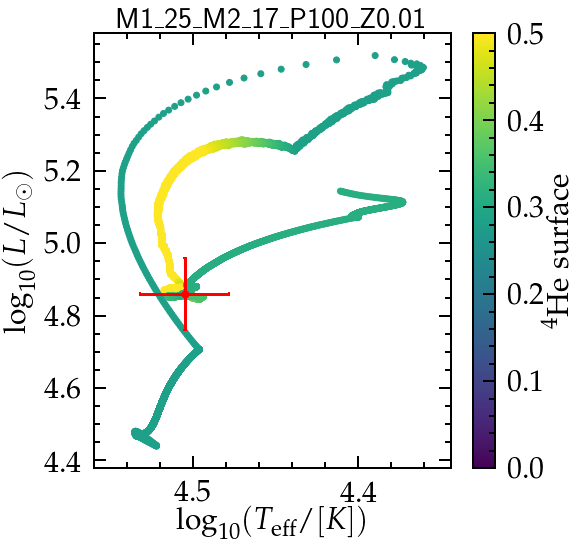

In [67]:
# analize MT
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

# plot_HRD(ax, hfile1=hfile1, c="#77CCCC", hfile2=hfile2, bfile=binary_exp_ov+"/binary_history.data", label=model_name)

#
vmin=0
vmax=0.5

logL, logTeff = getlogLlogTeff(hfile1)
src, col = getSrcCol(hfile1)
modnum = src[:, col.index("model_number")]
omega_div_omega_crit = src[:, col.index('surf_avg_omega_div_omega_crit')]
surface_he4 =  src[:, col.index('surface_he4')]
ax.scatter(logTeff, logL, c=surface_he4, zorder=2, vmin=vmin, vmax=vmax)
# j=4000
#ax.plot(logTeff[j], logL[j], c='k', mew=3, marker='x', ms=40, zorder=10)
# binary ------------------------------------------------------------------------------------
# src, col = getSrcCol(bfile)
# modnum = src[:, col.index("model_number")]
# rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
# ind = rl_relative_gap_1 > 0
# ax.scatter(logTeff[ind], logL[ind], c=modnum[ind], s=300, zorder=3, vmin=0, vmax=12000)
# --------------------------------------------------------------------------------------------
logL, logTeff = getlogLlogTeff(hfile2)
src, col = getSrcCol(hfile2)
modnum = src[:, col.index("model_number")]
omega_div_omega_crit = src[:, col.index('surf_avg_omega_div_omega_crit')]
surface_he4 =  src[:, col.index('surface_he4')]
p = ax.scatter(logTeff, logL, c=surface_he4, zorder=2, vmin=vmin, vmax=vmax)
# fig.colorbar(p, label="$\omega/\omega_\mathrm{crit}$")
fig.colorbar(p, label="$^4\mathrm{He} \ \mathrm{surface}$")
ax.legend(fontsize=20)
ax.set_title(model_name, size=30)
zeta_oph_HRD(ax)
ax.legend()
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")


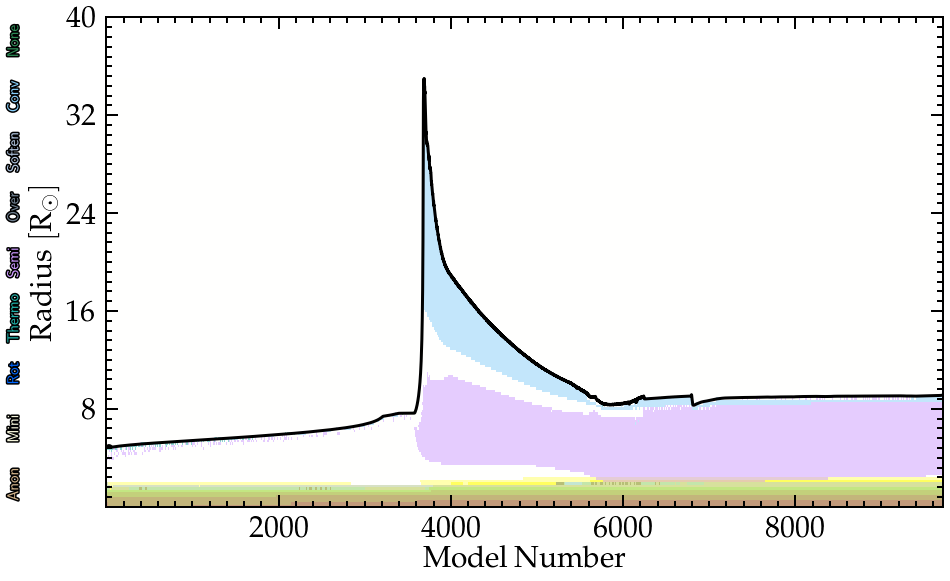

In [53]:
# Kippenhahn diagram
fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

x = 'model_number' # 'star_age' # 
y = 'radius' # 'mass' # 

mmm.loadHistory(f=binary_exp_ov+'/LOGS2')
ppp.plotKip3(mmm, fig=fig, ax=ax,
             xaxis=x,
             yaxis=y,
             reloadHistory=False,
             show_mass_loc=False,
             show_mix_labels=True,
             show=False,
             mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
             # age_lookback=True,
             age_log=False,
             zone_frac = 10, # 0.2,
             colorbar=False,
             cmin=-12.45, cmax=12.5)

if y=='radius':
    ax.set_ylim(ymax=40)


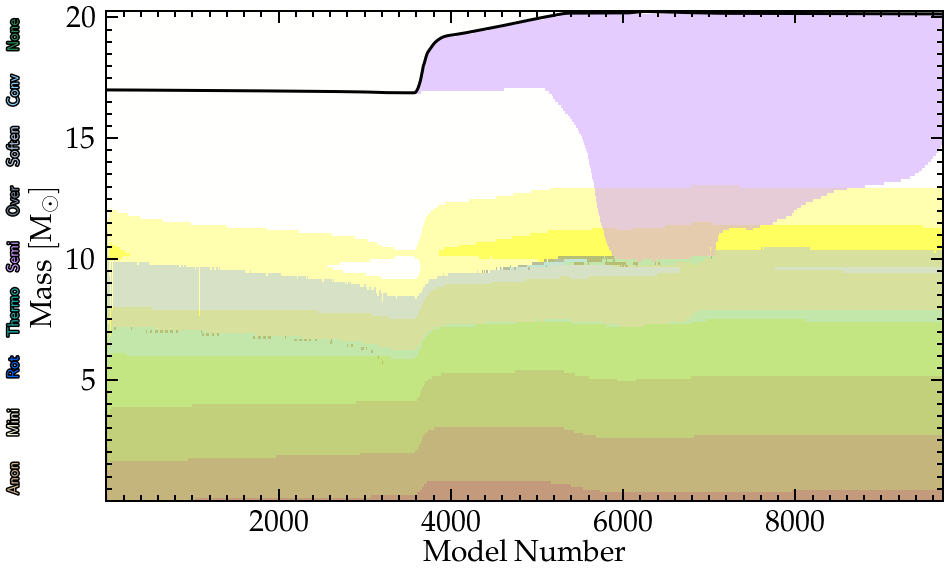

In [54]:
fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

x = 'model_number' # 'star_age' # 
y = 'mass' # 'radius' # 

mmm.loadHistory(f=binary_exp_ov+'/LOGS2')
ppp.plotKip3(mmm, fig=fig, ax=ax,
             xaxis=x,
             yaxis=y,
             reloadHistory=False,
             show_mass_loc=False,
             show_mix_labels=True,
             show=False,
             mix_alpha=0.5,# mix_hatch='//', hatch_color='#98ef56', 
             # age_lookback=True,
             age_log=False,
             zone_frac = 10, # 0.2,
             colorbar=False,
             cmin=-12.45, cmax=12.5)

if y=='radius':
    ax.set_ylim(ymax=40)


0.67746 0.31263 0.00145 0.00125 0.00414


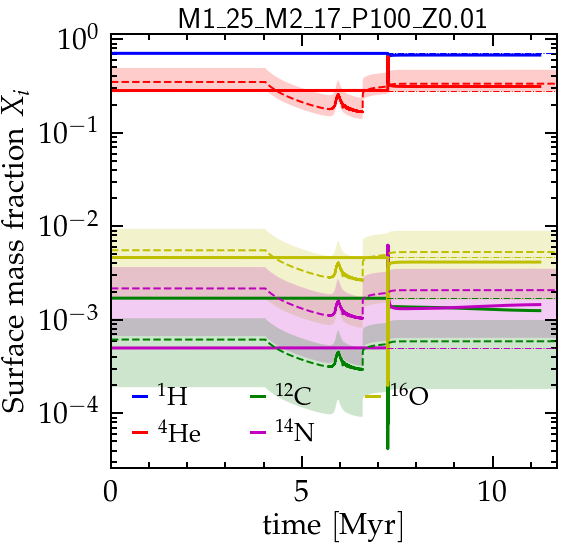

In [60]:
# chemical composition
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

final_h1, final_he4, final_n14, final_c12, final_o16 = plot_surface_abundances(hfile1, hfile2, ax=ax, label=model_name)
ax.legend(handlelength=0.5, handletextpad=0.5, ncol=3, loc="best", fontsize=25)
ax.set_yscale('log')
ax.set_xlim(0,11.7)
print(f"{final_h1:0.5f}", f"{final_he4:0.5f}", f"{final_n14:0.5f}", f"{final_c12:0.5f}", f"{final_o16:0.5f}")

Text(0, 0.5, '$v_\\mathrm{rot} \\ \\mathrm{[km\\ s^{-1}]}$')

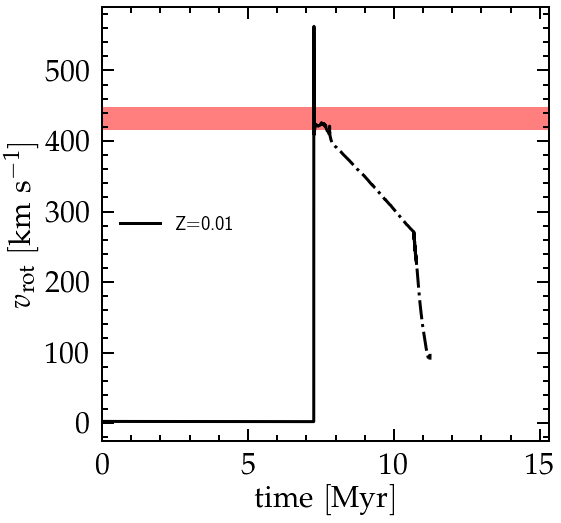

In [7]:
# surface rotation rate
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

plot_surface_rotation_time(ax, hfile1, c='k', hfile2=hfile2, label="Z=0.01")

# overplot observational range
vsini, err_vsini = get_zeta_oph_vsini()
ax.set_xlim(0, 15.3)
xmin, xmax = ax.get_xlim()
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
ax.legend(loc="center left", fontsize=20)
ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
# ax.set_xlim(xmin=8)
# ax.set_ylim(ymin=200)
ax.set_ylabel(r"$v_\mathrm{rot} \ \mathrm{[km\ s^{-1}]}$")

Text(0, 0.5, '$\\log_{10}(g/\\mathrm{cm\\ s^{-2}})$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


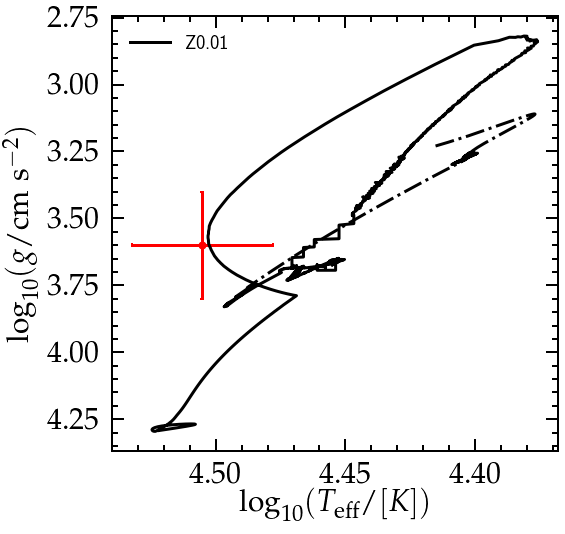

In [13]:
# spectroscopic HRD
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])
plot_spectroscopic_HRD(ax, hfile1, c='k', hfile2=hfile2, label=model_name)
zeta_oph_spectroscopicHRD(ax)
ax.legend(fontsize=20)    
ax.invert_xaxis()
ax.invert_yaxis()    
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(g/\mathrm{cm\ s^{-2}})$")


/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/exponential_ov//binary_to_donor_Hedepl/


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


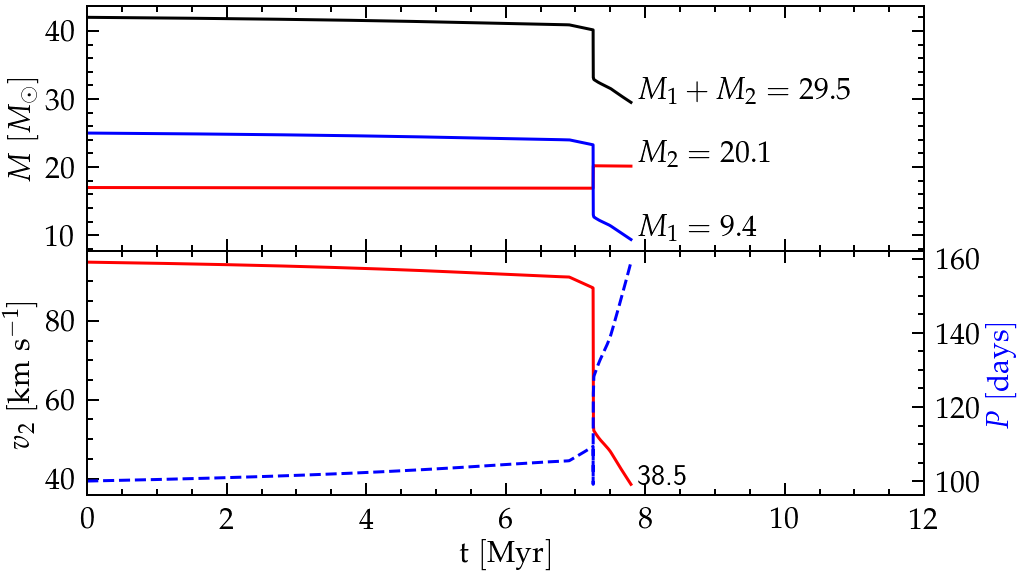

In [30]:
# orbital evolution
MassVelocityEvolution(binary_exp_ov, figName="")